## This notebook shows how to generate the sensitivity matrix for the CRN model 
This method uses the bioscrape toolbox and the sensitivity analysis included in the toolbox 
This notebook is used to plot and save the sensitivity matrix for the model without deg-tag
Created two separate files so that they can be run in parallel as the estimation of sensitivity matrix can be computationally expensive depending on the simulation step size
More information on how to use the bioscrape's sensitivity analysis tool can be found at: https://github.com/biocircuits/bioscrape/blob/master/examples/Sensitivity%20Analysis%20using%20Bioscrape.ipynb

In [1]:
## Import all the libraries 

from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.analysis import py_get_jacobian, py_get_sensitivity_to_parameter
from bioscrape.analysis import py_sensitivity_analysis

import numpy as np
import lmfit 
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [2]:
model_degtag = Model(sbml_filename = 'GEAGS_biocrnpyler_degtag_070824.xml')
model_no_tag = Model(sbml_filename = 'GEAGS_biocrnpyler_no_degtag_070824.xml')

N_steps = 50
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)

tf_I = int(N_steps * 0.72) # Indice to represent 720 minutes in the simulation
tf_i = 72 # Indice to represent 720 minutes in the experimental data 

In [3]:
## Creating the parameter file 
## This step is optional if the parameters of the model need no changes. 

params = lmfit.Parameters()

p = pd.read_csv('GEAGS_param_file_070824.csv').to_numpy()
p = p[:,2]


params.add(name = 'k_RNAP', value = p[0]*1, min = 0.014*0.33*0, max = 0.015*3.33, vary = 1)
params.add(name = 'k_Ribo', value = p[1]*1, min = 0.014*0.33*0, max = 0.015*3.33, vary = 1)
params.add(name = 'k_tRNA', value = p[2]*1 , min = 0.014*0.3*0, max = 0.015*3.33, vary = 1)
params.add(name = 'k_Et', value = p[3]*1, min = 0.014*0.33*0, max = 0.021, vary = 1)
params.add(name = 'k_protease', value = p[4]*1, min = 0.014*0.33*0, max = 0.015*3.33, vary = 1)

params.add(name = "Sigma_IC", value = p[5]*1, min = 150, max = 1000, vary = 1)
params.add(name = "RNAP_IC", value = p[6]*1, min = 200, max = 1000, vary = 1)
params.add(name = "NT_IC", value = p[7]*1, min = 10, max = 1000, vary = 1)
params.add(name = "RNAase_IC", value = p[8]*1, min = 10, max = 1000, vary = 1)
params.add(name = "Et_IC", value = p[9]*1, min = 250, max = 600, vary = 1)
params.add(name = "AA_IC", value = p[10]*1, min = 300, max = 50000, vary = 1)
params.add(name = "tRNA_IC", value = p[11]*1, min = 155, max = 900, vary = 1)
params.add(name = "Ribo_IC", value = p[12]*1, min = 250, max = 900, vary = 1)
params.add(name = "protease_IC", value = p[13]*1, min = 250, max = 900, vary = 1)

params.add(name = "Ribo_min", value = p[14]*1, min = 100, max = 250, vary = 1)
params.add(name = "tRNA_min", value = p[15]*1, min = 100, max = 155, vary = 1)
params.add(name = "RNAP_min", value = p[16]*1, min = 100, max = 200, vary = 1)
params.add(name = "Et_min", value = p[17]*1, min = 100, max = 250, vary = 1)
params.add(name = "protease_min", value = p[18]*1, min = 100, max = 250, vary = 1)

k_tx_1b = 0.0371*1
k_tx_2u = 0.097*2

params.add(name = 'k_tx_1b', value = p[19]*1, min = 1*1e-3, max = 1*1e-1, vary = 1)
params.add(name = 'k_tx_1u', value = p[20], min = k_tx_1b*100, max = k_tx_1b*1000, vary = 1)
params.add(name = 'k_tx_2b', value = p[21]*1 , min = k_tx_2u/1000, max = k_tx_2u/100, vary = 1)
params.add(name = 'k_tx_2u', value = p[22]*1, min = 0.01, max = 0.1, vary = 1)
params.add(name = 'k_tx_3', value = p[23]*1, min = 0.001, max = 0.0036, vary = 1)
params.add(name = 'k_tx_4b', value = p[24], min = 0.1, max = 5, vary = 1)
params.add(name = 'k_tx_4u', value = p[25]*1, min = 100, max = 200, vary = 1)
params.add(name = 'k_tx_5', value = p[26]*1, min = 0.1, max = 10, vary = 1)

params.add(name = 'k_tl_1b', value = p[27], min = 0.03*0.33, max = 0.3*3.33, vary = 1)
params.add(name = 'k_tl_1u', value = p[28], min = 2.1e4*0.33, max = 2.1e4*3.33, vary = 0)
params.add(name = 'k_tl_2', value = p[29], min = 1.2e+04*0.33, max = 1.2e+04*3.33, vary = 0)
params.add(name = 'k_tl_3', value = p[30], min = 3*0.33, max = 3*3.33, vary = 0)
params.add(name = 'k_tl_4', value = p[31], min = 8.22e+02*0.33, max = 8.22e+02*3.33, vary = 0)
params.add(name = 'k_tl_5', value = p[32], min = 101.1*0.33, max = 101.1*3.33, vary = 0)
params.add(name = 'k_tl_6b', value = p[33]*1, min = 1.8e-3*0.33, max = 1.8e-3*3.33, vary = 1)
params.add(name = 'k_tl_6u', value = p[34]*1, min = 6.0e+02*0.33, max = 6.0e+02*3.33, vary = 0)
params.add(name = 'k_tl_7', value = p[35]*1, min = 1.6, max = 4.25, vary = 1)
params.add(name = 'k_tl_8', value = p[36]*1, min = 0.1, max = 0.2, vary = 1)
params.add(name = "b_tl_8", value = p[37]*1, min = 0.5, max = 1, vary = 1)
params.add(name = 'k_tl_9', value = p[38]*1, min = 0.05, max = 10, vary = 1)
params.add(name = 'b_tl_7', value = p[39]*1, min = 0.4, max = 1.5, vary = 1)
params.add(name = 'k_tl_10', value = p[40]*1, min = 0.0005, max = 0.01, vary = 1)
params.add(name = 'k_tl_11', value = p[41]*1, min = 0.0005, max = 0.1, vary = 1)
params.add(name = 'k_tl_12', value = p[42]*1, min = 10, max = 1e3, vary = 1)
params.add(name = 'k_tl_13b', value = p[43]*1, min = 0.1, max = 10, vary = 1)
params.add(name = 'k_tl_13u', value = p[44]*1, min = 50, max = 100000, vary = 1)
params.add(name = 'P_max', value = p[45]*1, min = 1e3, max = 1e6, vary = 0)

params.add(name = 'C_max', value = p[46], vary = 0)
params.add(name = "C_0", value = p[47], vary = 0)
params.add(name = "k_gr", value = p[48], vary = 0)


In [4]:
## Initializing model 
## Applies all the parameter changes to the model and also modifies the Initial conditions which are 0 by default in biocrnpyler model 


def initialize_CRN_model(param, model_degtag, model_no_tag, timepoints): 
    params = param.valuesdict()

    Ribo_min = params['Ribo_min']

    tRNA_min = params['tRNA_min']
    
    RNAP_min = params['RNAP_min']

    Et_min = params['Et_min']

    protease_min = params['protease_min']
    
    n = 5.5

    model_degtag.set_species({'dna_X': 100,
    'protein_RNAP_machinery': params['RNAP_IC'],
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_units': params['NT_IC'],
    'protein_Ribo_machinery': params['Ribo_IC'],
    'protein_AA_units0tl': params['AA_IC'],
    'protein_tRNA_machinery': params['tRNA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_Et_machinery': params['Et_IC'],
    'protein_protease_machinery': params['protease_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_X':0,
    'protein_X':0,
    'cell_count_count': 6666666.67})

    model_no_tag.set_species({'dna_X': 100,
    'protein_RNAP_machinery': params['RNAP_IC'],
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_units': params['NT_IC'],
    'protein_Ribo_machinery': params['Ribo_IC'],
    'protein_AA_units0tl': params['AA_IC'],
    'protein_tRNA_machinery': params['tRNA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_Et_machinery': params['Et_IC'],
    'protein_protease_machinery': params['protease_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_X':0,
    'protein_X':0,
    'cell_count_count': 6666666.67})

    model_degtag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'k_rnap__bacterial_transcription':params['k_RNAP'],
    'rnap_min__bacterial_transcription': RNAP_min,
    'k_ribo__bacterial_translation':params['k_Ribo'],
    'ribo_min__bacterial_translation': Ribo_min,
    'k_tRNA__bacterial_translation':params['k_tRNA'],
    'tRNA_min__bacterial_translation': tRNA_min,
    'k_Et__bacterial_translation':params['k_Et'],
    'Et_min__bacterial_translation': Et_min,
    'k_protease__bacterial_translation':params['k_protease'],
    'protease_min__bacterial_translation': protease_min,

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__':params['k_tx_4b'],
    'k_tx_4u__':params['k_tx_4u'],
    'k_tx_5__': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2__bacterial_translation':params['k_tl_2'],
    'k_tl_3__bacterial_translation':params['k_tl_3'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'k_tl_6b__bacterial_translation':params['k_tl_6b'],
    'k_tl_6u__bacterial_translation':params['k_tl_6u'],
    'k_tl_7__bacterial_translation':params['k_tl_7'],
    'b_tl_7__bacterial_translation':params['b_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'P_max__bacterial_translation':params['P_max'],
    'b_tl_8__bacterial_translation':params['b_tl_8'],
    'k_tl_9__': params['k_tl_9'],
    'k_tl_10__': params['k_tl_10'],
    'k_tl_11__': params['k_tl_11'],
    'k_tl_12__bacterial_translation': params['k_tl_12'],
    'k_tl_13b__':params['k_tl_13b'],
    'k_tl_13u__':params['k_tl_13u'],
    'n__': n, 
    'n__mrna_degradation': n})

    model_no_tag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'k_rnap__bacterial_transcription':params['k_RNAP'],
    'rnap_min__bacterial_transcription': RNAP_min,
    'k_ribo__bacterial_translation':params['k_Ribo'],
    'ribo_min__bacterial_translation': Ribo_min,
    'k_tRNA__bacterial_translation':params['k_tRNA'],
    'tRNA_min__bacterial_translation': tRNA_min,
    'k_Et__bacterial_translation':params['k_Et'],
    'Et_min__bacterial_translation': Et_min,

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__':params['k_tx_4b'],
    'k_tx_4u__':params['k_tx_4u'],
    'k_tx_5__': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2__bacterial_translation':params['k_tl_2'],
    'k_tl_3__bacterial_translation':params['k_tl_3'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'k_tl_6b__bacterial_translation':params['k_tl_6b'],
    'k_tl_6u__bacterial_translation':params['k_tl_6u'],
    'k_tl_7__bacterial_translation':params['k_tl_7'],
    'b_tl_7__bacterial_translation':params['b_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'P_max__bacterial_translation':params['P_max'],
    'b_tl_8__bacterial_translation':params['b_tl_8'],
    #'k_tl_9__': params['k_tl_9'],
    'k_tl_10__': params['k_tl_10'],
    'k_tl_11__': params['k_tl_11'],
    'k_tl_12__bacterial_translation': params['k_tl_12'],
    'n__': n, 
    'n__mrna_degradation': n})

    return model_degtag, model_no_tag

In [5]:
## Simulate the model using bioscrape to visualize the model 

model_degtag, model_no_tag = initialize_CRN_model(params, model_degtag, model_no_tag, timepoints)

sol_deg = py_simulate_model(timepoints = timepoints, Model = model_degtag)
sol_no_deg = py_simulate_model(timepoints = timepoints, Model = model_no_tag)

/Users/harikrishnan/anaconda3/envs/geags/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/harikrishnan/anaconda3/envs/geags/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


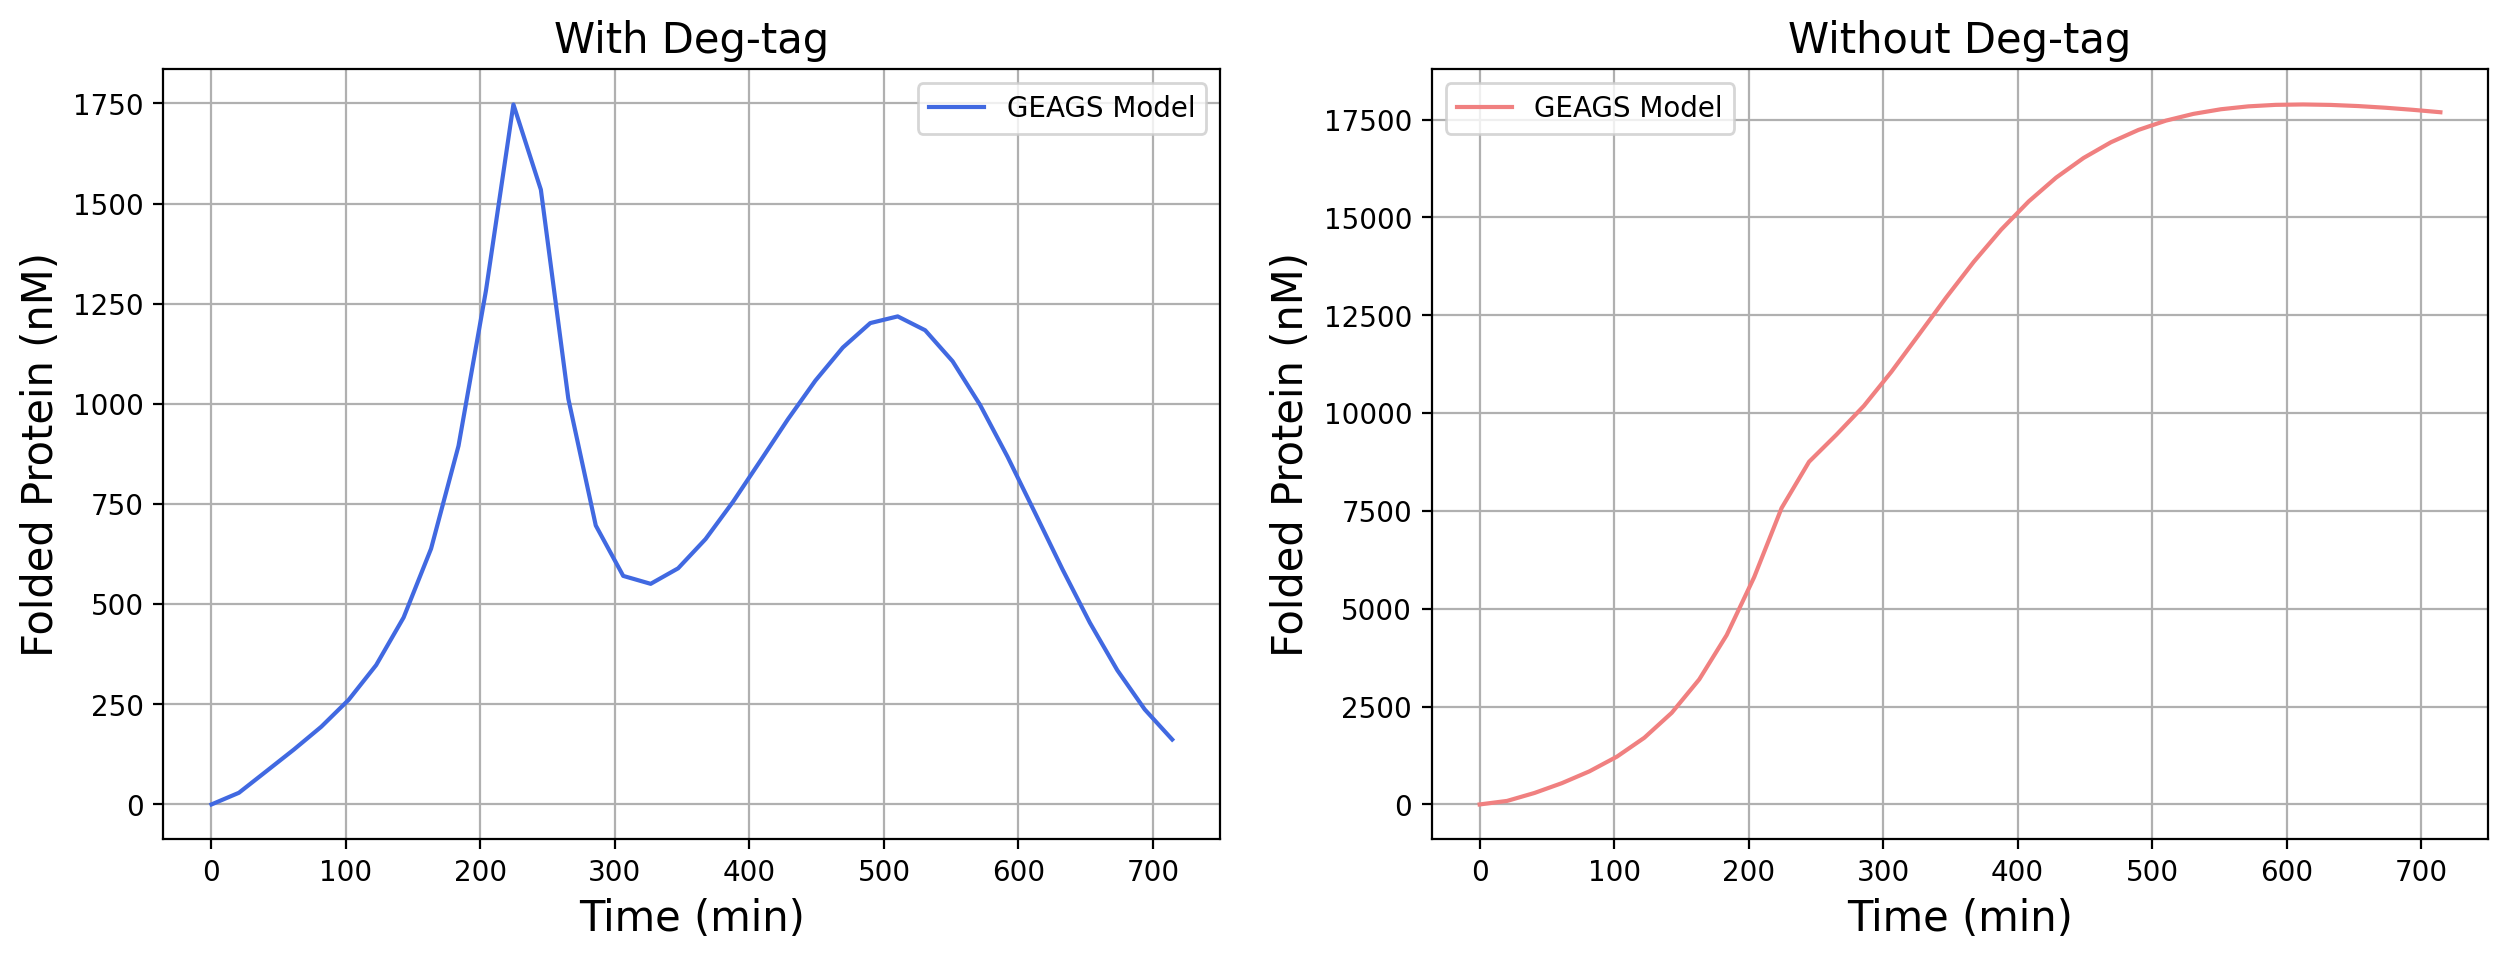

In [6]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)


i = 0
ax[i].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I], label = "GEAGS Model", color = 'royalblue')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('With Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()

i = 1
ax[i].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I], label = "GEAGS Model", color = 'lightcoral')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('Without Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()


In [7]:
## Visualize Jacobian for degtag model 
## Optional step. Does not change the sensitivity analysis step 

states = model_no_tag.get_species_array()

jacobian = py_get_jacobian(model_no_tag, states, method = 'fourth_order_central_difference')
print('Jacobian:')
print(jacobian)

Jacobian:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.97944386e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.29161934e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.94892550e+01 -1.01643994e+01  0.00000000e+00
   0.00000000e+00  1.36835890e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.00000000e-10  2.26130571e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.95135584e+01 -1.01643994e+01  0.00000000e+0

In [8]:
## Run sensitivity analysis 
## Use the normalize = True argument to normalize the sensitivity matrix

SSM_no_tag = py_sensitivity_analysis(model_no_tag, timepoints, normalize = True)

/Users/harikrishnan/anaconda3/envs/geags/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/harikrishnan/anaconda3/envs/geags/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/harikrishnan/anaconda3/envs/geags/lib/python3.8/site-packages/bioscrape/analysis.py:244: RuntimeWarning: invalid value encountered in divide
  SSM_normalized[:,j,i] = np.divide(SSM[:,j,i]*params_values[j], solutions[:,i])
/Users/harikrishnan/anaconda3/envs/geags/lib/python3.8/site-packages/bioscrape/analysis.py:244: RuntimeWarning: divide by zero encountered in divide
  SSM_normalized[:,j,i] = np.divide(SSM[:,j,i]*params_values[j],

In [9]:
# Set of codes to obtain information regarding the size of the SSM matrix, names of species and their indices to print the appropriate data

a = model_no_tag.get_parameter_values() # To see how many parameters are there in the analysis 
Np = len(a)
np.shape(a), Np

((39,), 39)

In [10]:
# To visualize the names of all the species in the model 

model_no_tag.get_species_list()

['dna_X',
 'protein_RNAP_machinery',
 'protein_sigma_machinery',
 'protein_NT_units',
 'rna_T_X',
 'complex_protein_RNAP_machinery_protein_sigma_machinery_',
 'complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_',
 'protein_Ribo_machinery',
 'protein_AA_units0tl',
 'protein_tRNA_machinery',
 'protein_X',
 'protein_unfolded_protein_degtag',
 'protein_Et_machinery',
 'protein_peptide_chain_peptide',
 'protein_protease_machinery',
 'complex_protein_AA_units0tl_protein_Et_machinery_',
 'complex_complex_protein_AA_units0tl_protein_Et_machinery__protein_tRNA_machinery_',
 'complex_protein_AA_units0tl_protein_tRNA_machinery_',
 'complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_',
 'complex_protein_protease_machinery_protein_unfolded_protein_degtag_',
 'complex_protein_X_protein_protease_machinery_',
 'protein_RNAase_machinery',
 'cell_count_count',
 'complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_',
 'com

In [11]:
# To obtain the indice of protein species 

i_protein = model_no_tag.get_species_list().index('protein_X')
i_protein

10

In [12]:
# To visualize the order of the parameters appearing in the sensitivity matrix

model_no_tag.get_parameter_dictionary()

{'k_tx_1b__bacterial_transcription': 0.0506465896715939,
 'k_tx_1u__bacterial_transcription': 13.659285573115495,
 'k_tx_2b__bacterial_transcription': 0.000197944385967,
 'k_tx_2u__bacterial_transcription': 0.0546170223132887,
 'b_tx_4u__mrna_degradation': 1.0,
 'n__': 5.5,
 'c_max__logistic_cell_growth': 503666666.6666667,
 'k_tx_3__bacterial_transcription': 0.0023233141592824,
 'k_rnap__bacterial_transcription': 0.0249642652969019,
 'rnap_min__bacterial_transcription': 199.39800443544928,
 'k_tl_1b__bacterial_translation': 0.4530556941495391,
 'k_tl_1u__bacterial_translation': 69930.0,
 'k_tl_2__bacterial_translation': 39960.0,
 'k_tl_3__bacterial_translation': 9.957916186719975,
 'k_tl_4__bacterial_translation': 590.884399521651,
 'k_tl_5__bacterial_translation': 138.88246948556525,
 'k_tl_6b__bacterial_translation': 0.0019687854633064,
 'k_tl_6u__bacterial_translation': 742.7109797878584,
 'k_tl_7__bacterial_translation': 3.764560142456864,
 'b_tl_7__bacterial_translation': 1.17004

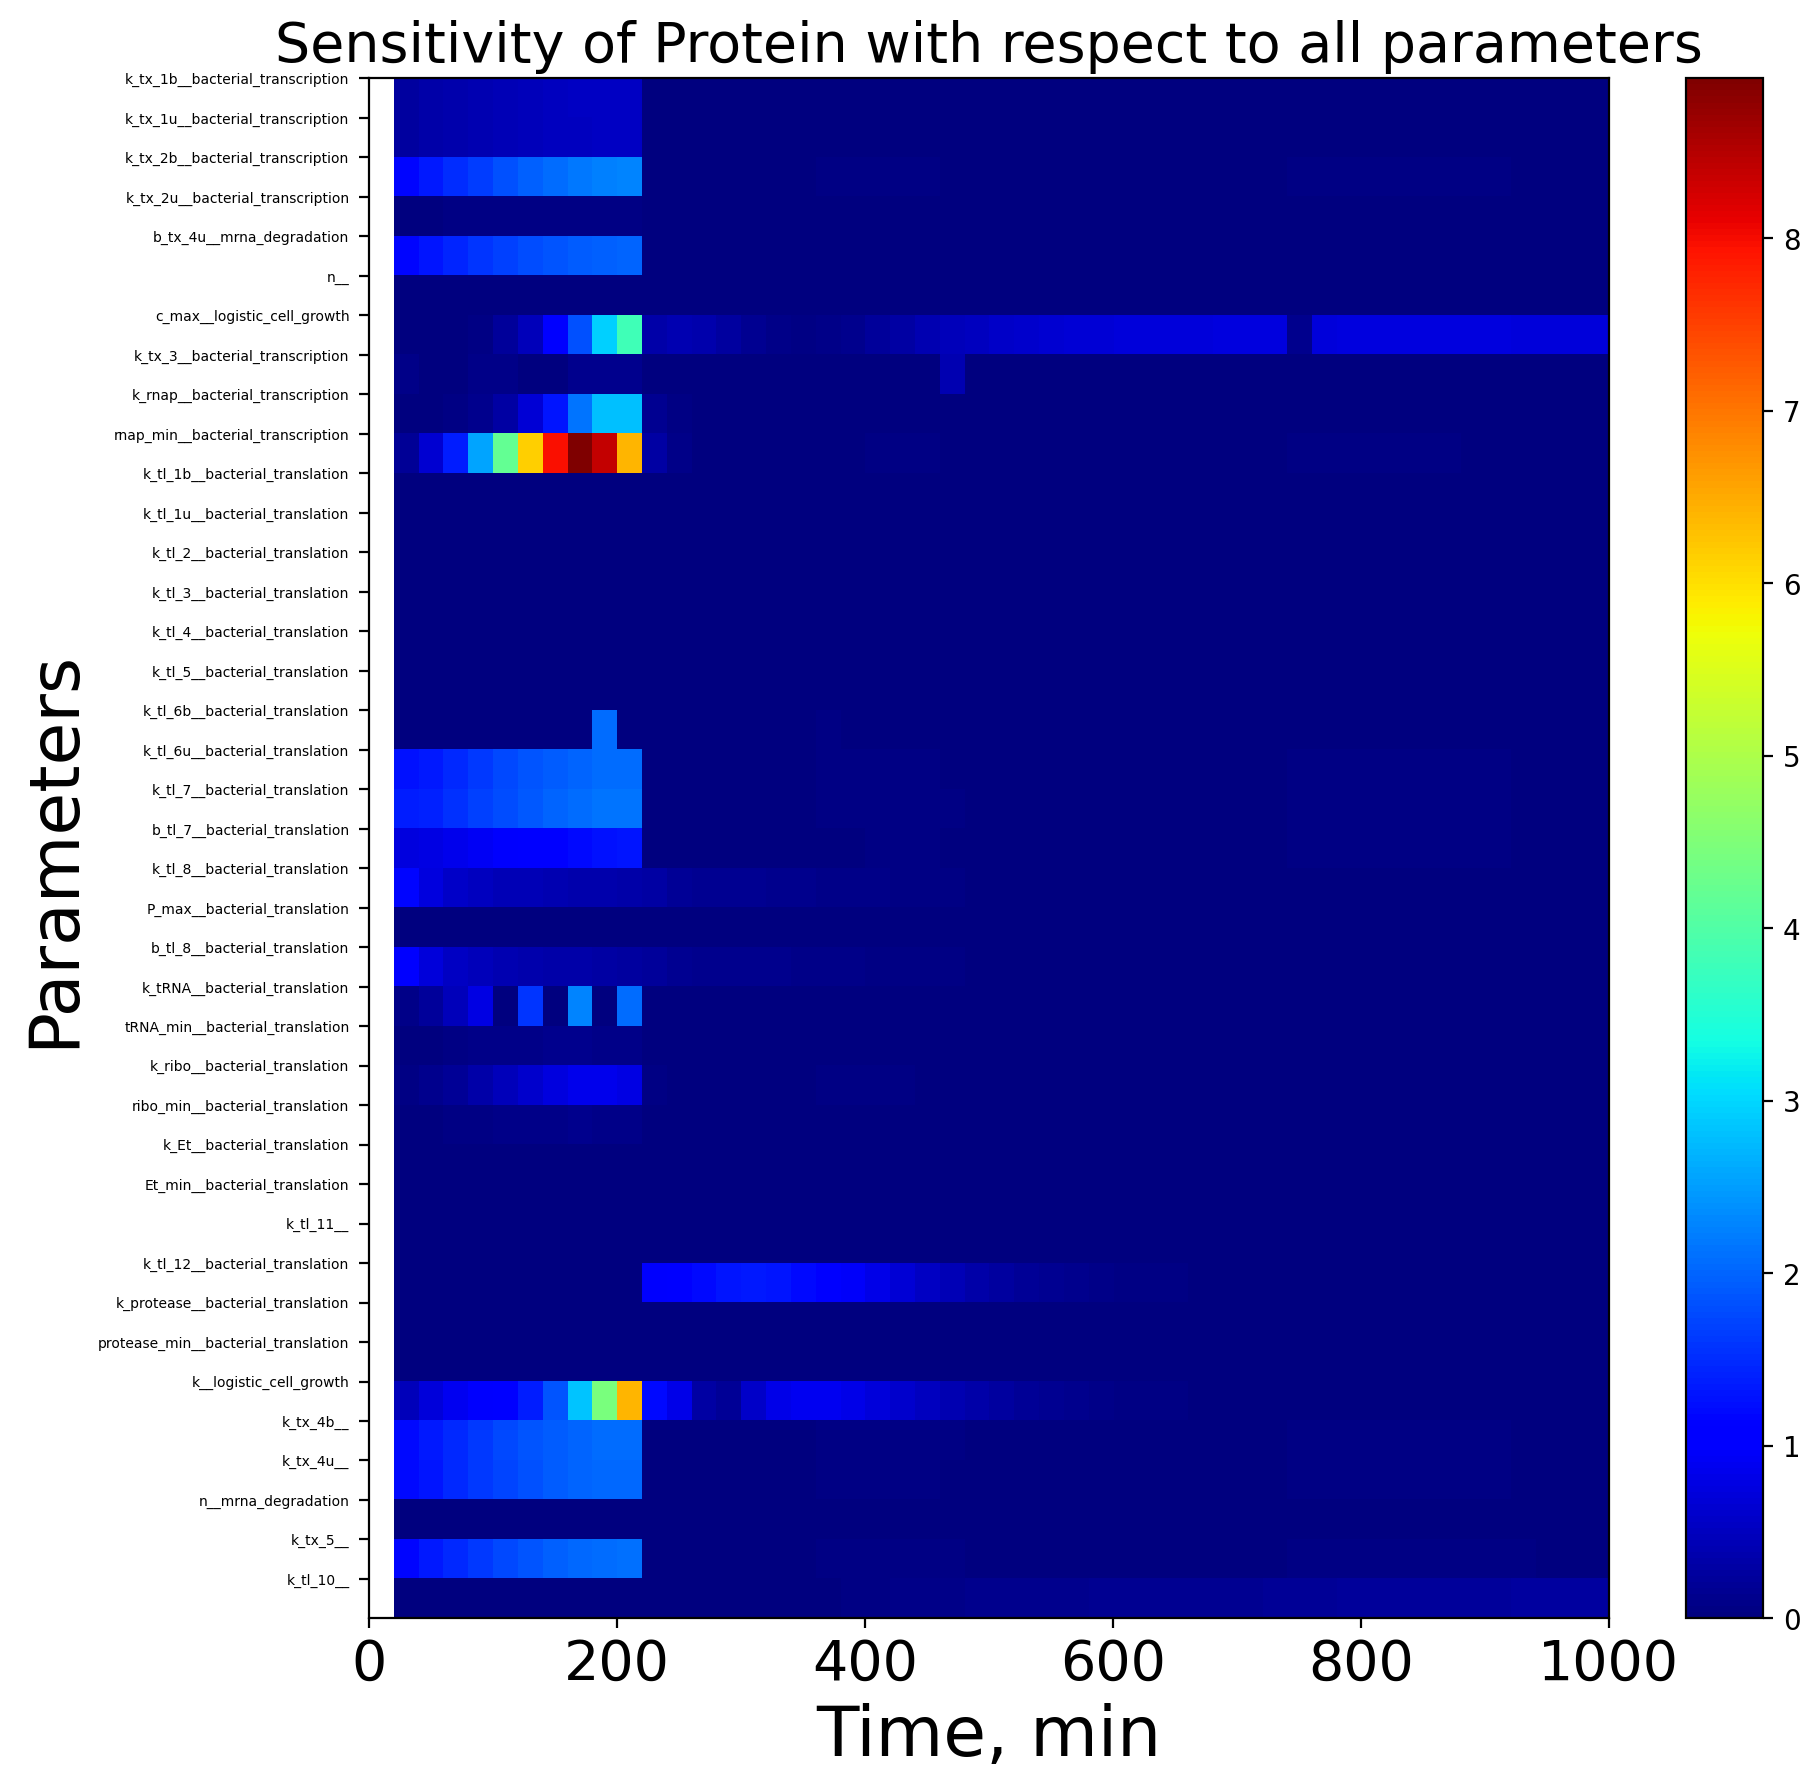

In [16]:
## Plotting the sensitivity matrix for the Protein species
## Plotting the absolute values of the sensitivity matrixc coefficients 

fig, axs = plt.subplots(1,1, figsize = (10,10), sharex = 'col')
h00 = axs.imshow(np.abs(SSM_no_tag[:,:,i_protein].T), cmap = 'jet', interpolation = 'nearest', aspect = 'auto', extent = [0,t_final,Np,0])
fig.colorbar(h00, ax = axs)
axs.set_ylabel('Parameters', fontsize = 25) ; axs.set_xlabel('Time, min', fontsize = 25)
#axs.yticks(list(model_degtag.get_parameter_dictionary().keys()), fontsize = 5)
axs.set_title('Sensitivity of Protein with respect to all parameters', fontsize = 20)
plt.xticks(fontsize = 20)
y_ticks = list(model_no_tag.get_parameter_dictionary().keys())
plt.yticks(range(len(y_ticks)), y_ticks, rotation='horizontal', fontsize = 5);

In [17]:
## Saving the data and exporting it for further analysis 

# np.save("SSM_no_tag_abs_072824.npy", np.abs(SSM_no_tag))